In [18]:
import pandas as pd
import numpy as np
import os
import random

from mlchartist.array_builder import build_arrays
from mlchartist.preprocessing import thresholds_encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

ImportError: cannot import name 'thresholds_encoding' from 'mlchartist.preprocessing' (/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/mlchartist/preprocessing.py)

# Function implementation from marcin_first_model

In [10]:
def stocks_selector_local(min_len = 2000, num_samp = 2, path='../raw_data/processed/'):
    """
    Returns a concatened Pandas DataFrame of the stocks data

    Randomly select the number of stocks (`num_samp`) in the `path` directory according their
        minimal lenght (`min_len` in days)
    """

    filenames = []

    for file in os.listdir(path):
        if file.endswith('.csv'):
            with open(path + file) as f:
                rows_num = sum(1 for line in f)
                if rows_num >= min_len:
                    filenames.append(file)
                    
    if len(filenames) < num_samp:
        print('Sample size bigger that nuber of companies available')
    else:
        sample = random.sample(filenames, num_samp)
    
    dfs = []

    for ticker in sample:
        ticker_df = pd.read_csv('../raw_data/processed/'+ticker)
        dfs.append(ticker_df)
    
    return pd.concat(dfs)

In [15]:
df = stocks_selector_local()

In [16]:
df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,PROV,2005-04-14,33.605532,2.311079,11.967919,66430.500762,-110352,0.539872,28.348953,18.060358,32.531068,-0.117027,-0.177892,0.060866,-0.019335,0.000000,-0.003230
1,PROV,2005-04-15,37.719014,11.078503,9.939929,63232.436443,-95328,0.547953,28.367105,16.524358,29.764361,-0.174816,-0.188545,0.013729,-0.075142,-0.030881,-0.033427
2,PROV,2005-04-18,35.771689,5.314534,6.234705,60321.114409,-105432,0.538313,28.512013,15.619553,29.261524,-0.233656,-0.197908,-0.035748,-0.025696,-0.003691,-0.032284
3,PROV,2005-04-19,46.176413,33.427877,16.606971,83613.114409,-82140,0.548291,27.567262,19.604278,26.678892,-0.223007,-0.149807,-0.073200,-0.055294,-0.012363,-0.052713
4,PROV,2005-04-20,36.428110,0.000000,12.914137,56710.114409,-109043,0.593341,27.563516,16.823586,29.595788,-0.295085,-0.177509,-0.117577,-0.001141,0.030415,0.029845


In [17]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = thr

In [410]:
FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
#INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal']

In [411]:
df['5D_return_bin'] = (df['5TD_return'] >= FIVE_TR)
df['10D_return_bin'] = (df['10TD_return'] >= TEN_TR)
df['20D_return_bin'] = (df['20TD_return'] >= TWENTY_TR)

In [412]:
test_df = df[df['date'].dt.year >= 2018]
train_df = df[df['date'].dt.year < 2018]

In [413]:
scaler = RobustScaler()

In [414]:
scaler.fit(train_df[INPUT_COLS])

RobustScaler()

In [415]:
train_df.loc[:, INPUT_COLS] = scaler.transform(train_df[INPUT_COLS])
test_df.loc[:, INPUT_COLS] = scaler.transform(test_df[INPUT_COLS])

/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [416]:
train_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,FB,2005-05-03,-0.264312,-0.833957,-0.772341,-0.114964,-0.162179,-0.386383,-0.972940,1.203858,...,-0.027996,-0.007849,-0.017159,0.011854,-0.075375,-0.114448,-0.008232,False,False,True
1,FB,2005-05-09,-0.264312,-0.787174,-0.858332,-0.114964,-0.162125,-0.409600,-1.016853,1.203858,...,-0.045427,-0.002111,-0.009960,0.019812,0.000000,-0.175795,-0.008232,False,False,True
2,FB,2005-05-10,-0.328529,-0.835950,-0.879595,-0.115051,-0.162174,-0.417644,-1.031726,1.356695,...,-0.063579,-0.007865,0.004014,0.047464,-0.084148,0.046667,0.003729,False,True,True
3,FB,2005-05-13,-0.221223,-0.182648,-0.646325,-0.114877,-0.162077,-0.391325,-1.006871,0.847356,...,-0.078996,-0.005625,0.008654,0.011034,0.116760,-0.161770,-0.057473,False,True,True
4,FB,2005-05-16,-0.343628,0.199136,-0.293073,-0.114877,-0.162082,-0.407120,-0.983792,0.779393,...,-0.094606,-0.007111,0.012757,0.052006,-0.146601,-0.095074,-0.149357,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,CYRN,2017-12-22,0.556068,0.143385,0.290929,-0.293253,0.834670,-0.586086,0.992907,0.337895,...,0.130407,0.020408,-0.018367,-0.051020,-0.402631,0.351089,0.218846,True,False,False
3192,CYRN,2017-12-26,0.817091,0.524354,0.359152,-0.293253,0.835774,-0.584642,1.055451,0.523339,...,0.125017,0.000000,-0.044000,-0.080000,0.813478,0.714351,0.604614,False,False,False
3193,CYRN,2017-12-27,0.241289,-0.047100,0.222706,-0.293253,0.834892,-0.578104,0.960382,0.225814,...,0.117819,0.014433,0.010309,-0.030928,-1.195813,-0.012173,0.353285,True,True,False
3194,CYRN,2017-12-28,0.380072,0.143385,0.222706,-0.293916,0.835261,-0.579830,0.872104,0.092729,...,0.110502,0.010776,-0.040816,-0.061224,0.410932,-0.188299,-0.033898,True,False,False


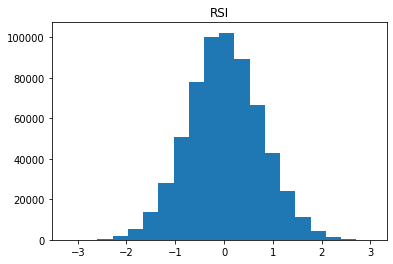

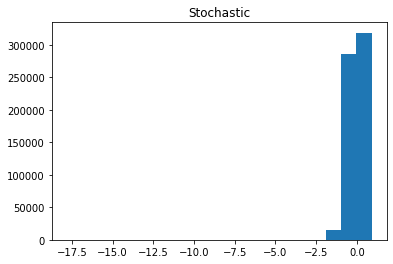

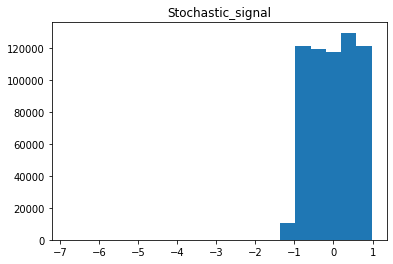

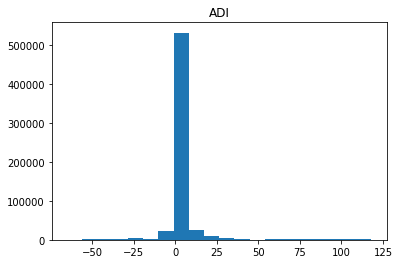

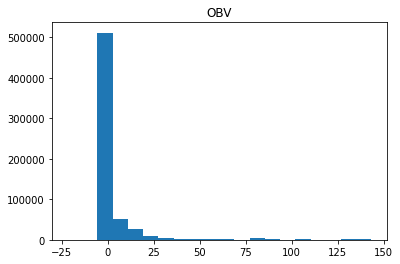

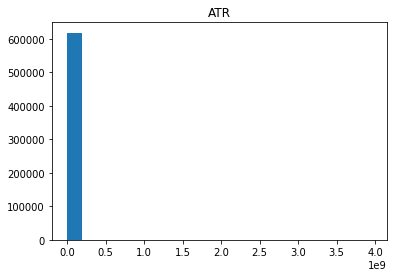

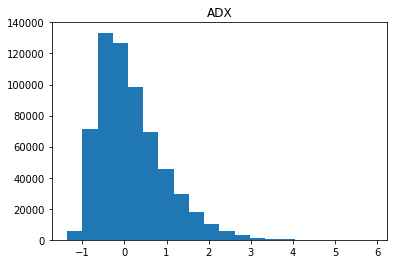

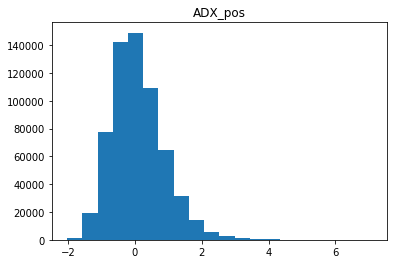

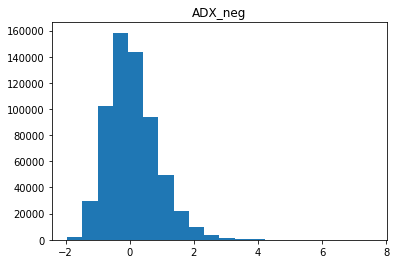

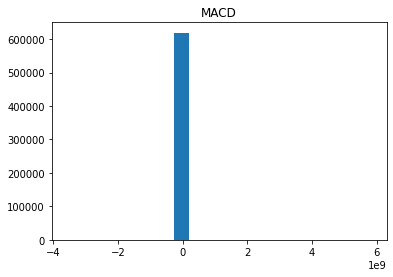

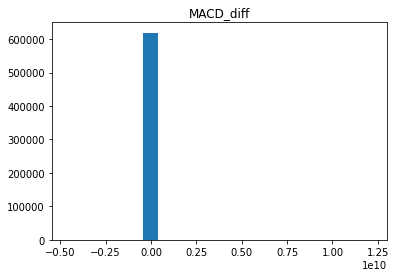

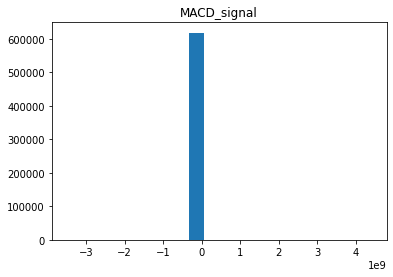

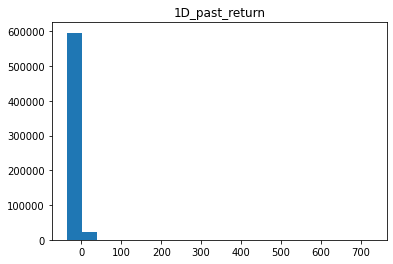

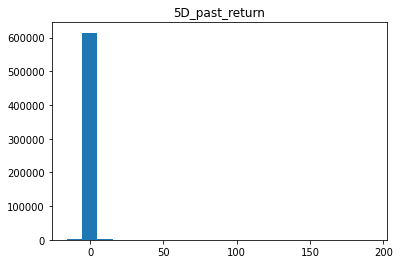

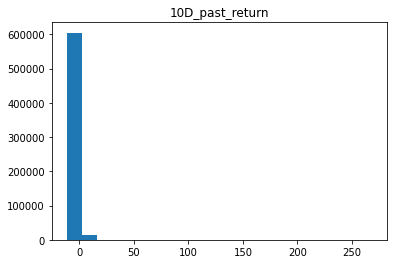

In [417]:
for col in INPUT_COLS:
    plt.hist(train_df[col], bins=20)
    plt.title(col)
    plt.show()

(array([   159.,    189.,    207.,    281.,    312.,    419.,    466.,
           574.,    806.,    996.,   1275.,   1669.,   2105.,   2787.,
          3689.,   5011.,   6653.,   9109.,  12737.,  17984.,  25882.,
         37593.,  54265.,  76250.,  99172., 113254.,  83860.,  59839.,
         41398.,  28332.,  19489.,  13843.,  10131.,   7532.,   5668.,
          4314.,   3460.,   2602.,   2009.,   1575.,   1358.,   1109.,
           918.,    752.,    675.,    579.,    479.,    390.,    333.,
           321.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <BarContainer object of 50 artists>)

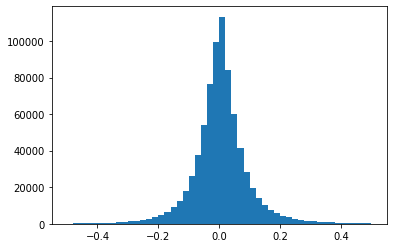

In [418]:
plt.hist(df['10TD_return'], bins=50, range=(-0.5, 0.5))

In [419]:
(df['10TD_return'] == 0).sum()/len(df)*100

1.146543390265831

In [420]:
(train_df['10D_past_return'] > 0.8).sum()

103515

In [421]:
tickers = train_df['ticker'].unique()

In [422]:
train_x_dfs = []
train_y_dfs = []
test_x_dfs = []
test_y_dfs = []

In [423]:
for ticker in tickers:
    ticker_train_df = train_df[train_df['ticker'] == ticker]
    ticker_test_df = test_df[test_df['ticker'] == ticker]
    ticker_train_x, ticker_train_y = build_arrays(ticker_train_df,input_cols=INPUT_COLS, target_col='20D_return_bin', time_window=6, stride=5)
    ticker_test_x, ticker_test_y = build_arrays(ticker_test_df,input_cols=INPUT_COLS, target_col='20D_return_bin', time_window=6, stride=5)
    train_x_dfs.append(ticker_train_x)
    train_y_dfs.append(ticker_train_y)
    test_x_dfs.append(ticker_test_x)
    test_y_dfs.append(ticker_test_y)

In [424]:
X_train = np.concatenate(train_x_dfs)
y_train = np.concatenate(train_y_dfs)
X_test = np.concatenate(test_x_dfs)
y_test = np.concatenate(test_y_dfs)

In [425]:
y_train.shape

(123817,)

In [426]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [427]:
X_train.shape

(123817, 6, 15)

In [428]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [429]:
# from tensorflow.keras.backend import expand_dims
# X_train = expand_dims(X_train, axis=-1)
# X_test = expand_dims(X_test, axis=-1)

In [430]:
import matplotlib.pyplot as plt

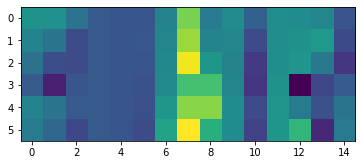

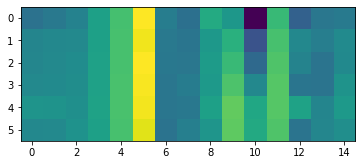

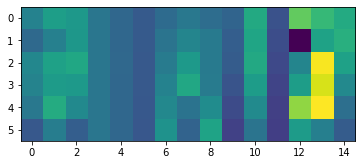

In [431]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[30000])
plt.show()
plt.imshow(X_train[100000])

In [440]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam

optim = RMSprop(learning_rate=0.0000001)

def init_model():
    model = Sequential()
    model.add(layers.LSTM(200, return_sequences=True, input_shape=(6,15), activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
    
    return model

In [ ]:
model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=8,
          validation_split=0.2,
          callbacks=[es]
         )

Epoch 1/500
12382/12382 [==============================] - 184s 15ms/step - loss: 0.6952 - accuracy: 0.4962 - val_loss: 0.6957 - val_accuracy: 0.4824
Epoch 2/500
12382/12382 [==============================] - 180s 15ms/step - loss: 0.6946 - accuracy: 0.4984 - val_loss: 0.6947 - val_accuracy: 0.4866
Epoch 3/500
12382/12382 [==============================] - 201s 16ms/step - loss: 0.6939 - accuracy: 0.5012 - val_loss: 0.6940 - val_accuracy: 0.4932
Epoch 4/500
12382/12382 [==============================] - 182s 15ms/step - loss: 0.6935 - accuracy: 0.5063 - val_loss: 0.6934 - val_accuracy: 0.5020
Epoch 5/500
12382/12382 [==============================] - 181s 15ms/step - loss: 0.6933 - accuracy: 0.5068 - val_loss: 0.6930 - val_accuracy: 0.5106
Epoch 6/500
12382/12382 [==============================] - 179s 14ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6926 - val_accuracy: 0.5159
Epoch 7/500
12382/12382 [==============================] - 175s 14ms/step - loss: 0.6927 - accuracy:

In [434]:
y_pred = model.predict(X_test)

In [435]:
y_pred.shape

(29749, 1)

In [436]:
y_test.sum()/len(y_test)

0.5272782278395912

In [439]:
model.evaluate(X_test, y_test)

930/930 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.5148


[0.6936075091362, 0.5148072242736816]

In [438]:
for i in range(0, len(y_pred), 500):
    print(f'Predicted {y_pred[i][0] >= 0.5}, test {y_test[i]}')

Predicted True, test 1.0
Predicted False, test 0.0
Predicted True, test 1.0
Predicted True, test 1.0
Predicted True, test 1.0
Predicted False, test 1.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 1.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 1.0
Predicted True, test 0.0
Predicted True, test 1.0
Predicted False, test 1.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted False, test 0.0
Predicted True, test 0.0
Predicted False, test 1.0
Predicted True, test 1.0
Predicted True, test 1.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 0.0
Predicted True, test 1.0
Predicted True, test 0.0
Predicted True, test 1.0
Predicted False, test 1.0
Predicted False, test 0.0
Predicted True, test 1.0
Predicted True, test 1.0
Predicted True, test 0.0
Predicted True, te

In [331]:
def initialize_model_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(30, 4, 1), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [332]:
model_2 = initialize_model_2()

model_2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_38/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](conv2d_39/Relu)' with input shapes: [?,7,1,128].

In [278]:
es = EarlyStopping(patience=5, restore_best_weights=True)

model_2.fit(X_train, y_train, 
          epochs=200, 
          batch_size=8,
          validation_split=0.2,
            callbacks=[es]
         )

Epoch 1/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6925 - val_accuracy: 0.5267
Epoch 2/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6922 - val_accuracy: 0.5267
Epoch 3/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6925 - val_accuracy: 0.5267
Epoch 4/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6927 - val_accuracy: 0.5267
Epoch 5/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6932 - val_accuracy: 0.4733
Epoch 6/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6926 - val_accuracy: 0.5267
Epoch 7/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6926 - val_ac

In [415]:
y_test.sum()/y_test.shape[0]

0.593103448275862

In [18]:
y_pred = model.predict(X_test)